In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from thinfilm_v5 import sec_reflc as sr
from scipy.optimize import differential_evolution, minimize

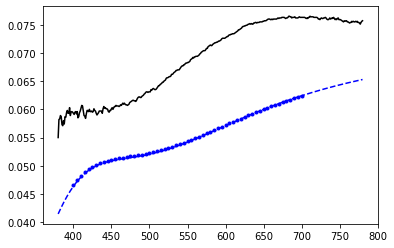

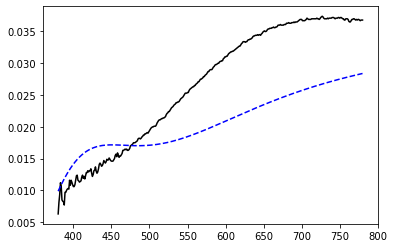

In [3]:
wl = np.linspace(380, 780, 401)
air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime = ml.open_material('sodalime', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')
glass = ml.Non_Dispersion(1.52)

nanya = pd.read_csv('./Nanya/Nanya_sim.csv')
nyw = nanya['nm'].values
nyr = nanya['R_dia'].values

notap = pd.read_csv('./Nanya/R_5_4.csv')['SCAN']
blacktap = pd.read_csv('./Nanya/R_5_B4.csv')['SCAN']

dia = tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, 75, 31, 45, 8, None]
)

RRR = sr(dia, wl, 5)

plt.plot(nyw, nyr/100, '.b')
plt.plot(wl, notap/100, '-k')
plt.plot(wl, RRR, '--b')

plt.show()
plt.plot(wl, blacktap/100, '-k')
plt.plot(wl, dia.reflectance(wl, 5),'--b')
plt.show()
#print(wl)

In [4]:
hypo = lambda th:tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
)

fom = lambda th: sum(
    abs(
        hypo(th).reflectance(wl, 10)-blacktap/100
    )
) + sum(
    abs(
        sr(hypo(th), wl, 10)-notap/100
    )
)

fom1 = lambda th: np.mean(
    abs(
        hypo(th).reflectance(wl, 10)-blacktap/100
    )
)

fom2 = lambda th: np.mean(
    abs(
        sr(hypo(th), wl, 5)-notap/100
    )
)

In [8]:
sol = differential_evolution(fom, [(70,80),(28,30),(40,50),(6,10)])
print(sol.x)

[70.         28.         40.05983132  6.        ]


In [9]:
sol2 = minimize(fom1, sol.x)
print(sol2.x)

[65.36635015 24.19910035 35.4614302   7.45367433]


In [11]:
sol3 = minimize(fom2, sol.x)
print(sol3.x)

[56.63848418 17.16738142 42.42888606  7.03908118]


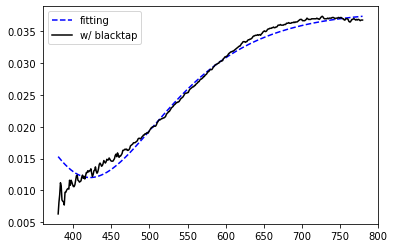

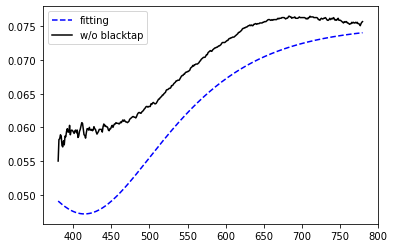

In [18]:
plt.plot(wl, hypo(sol2.x).reflectance(wl, 5), '--b',label = 'fitting')
plt.plot(wl, blacktap/100, '-k', label = 'w/ blacktap')
plt.legend(loc = 'best')
plt.show()
plt.plot(wl, sr(hypo(sol2.x), wl, 5), '--b',label = 'fitting')
plt.plot(wl, notap/100, '-k',label = 'w/o blacktap')
plt.legend(loc = 'best')
plt.show()